In [51]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv("personenmobiliteit incl. namen.csv", delimiter=',', index_col='ID')
display(data)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Verplaatsingen_1,Afstand_2,Reisduur_3,Verplaatsingen_4,Afstand_5,Reisduur_6
ID,,,,,,,,,,,
0,10000,Totaal,Totaal,Nederland,2010,2.77,30.31,62.54,963.0,10536.0,362.3
1,10000,Totaal,Totaal,Nederland,2011,2.67,30.69,61.33,928.0,10675.0,355.5
2,10000,Totaal,Totaal,Nederland,2012,2.68,29.39,60.45,936.0,10253.0,351.5
3,10000,Totaal,Totaal,Nederland,2013,2.68,30.49,61.18,933.0,10611.0,354.8
4,10000,Totaal,Totaal,Nederland,2014,2.69,30.74,62.74,937.0,10694.0,363.8
...,...,...,...,...,...,...,...,...,...,...,...
126715,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2013,NaN,NaN,NaN,NaN,NaN,NaN
126716,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2014,NaN,NaN,NaN,NaN,NaN,NaN
126717,20100,Overige vervoerwijze,Vertrektijdstip: avond 18 tot 24 uur,Niet stedelijk,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data = data[['Populatie', 'Vervoerwijzen', 'KenmerkenVerplaatsing', 'RegioS', 'Perioden', 'Afstand_2']]
population_total = data[data['Populatie'].isin([10000])] # filter data on total population (uitsluiten van alleen populatie 12 jaar of ouder)
car_and_train = population_total[population_total['Vervoerwijzen'].isin(['Auto (passagier)', 'Auto (bestuurder)', 'Trein'])] # filter data on cars

## Kilometers per year

In [54]:
car_and_train_total = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Totaal'])]
total_Nederland = car_and_train_total[car_and_train_total['RegioS'] == 'Nederland']

C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\4109390152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_Nederland.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\4109390152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_Nederland.loc[:, 'Maand'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\4109390152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,15.33,7.32,22.65,2.47
2011-01-01,16.00,6.45,22.45,2.79
2012-01-01,15.28,6.27,21.55,2.68
2013-01-01,15.63,6.78,22.41,2.97
2014-01-01,15.57,6.70,22.27,2.75
2015-01-01,15.30,6.11,21.41,2.66
2016-01-01,15.14,6.21,21.35,2.80
2017-01-01,14.91,6.08,20.99,3.00


<Axes: xlabel='Datum'>

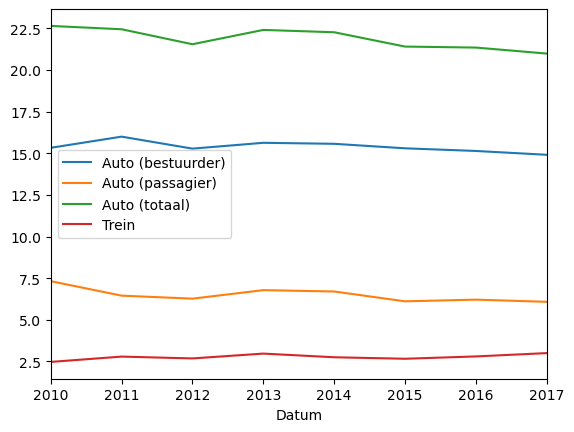

In [55]:
total_Nederland.loc[:, 'Dag'] = 1
total_Nederland.loc[:, 'Maand'] = 1

total_Nederland['Datum'] = (
    total_Nederland['Perioden'].astype(str) + '-' +
    total_Nederland['Maand'].astype(str).str.zfill(2) + '-' +
    total_Nederland['Dag'].astype(str).str.zfill(2)
)
total_Nederland['Datum'] = pd.to_datetime(total_Nederland['Datum'])
total_Nederland.set_index('Datum', inplace=True)

auto_bestuurder_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Auto (bestuurder)']
auto_passagier_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Auto (passagier)']
trein_NL = total_Nederland[total_Nederland['Vervoerwijzen'] == 'Trein']

nederland_per_year = auto_bestuurder_NL[['Afstand_2']].copy()
nederland_per_year.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
nederland_per_year['Auto (passagier)'] = auto_passagier_NL[['Afstand_2']]
nederland_per_year['Auto (totaal)'] = nederland_per_year['Auto (bestuurder)'] + nederland_per_year['Auto (passagier)']
nederland_per_year['Trein'] = trein_NL[['Afstand_2']]

display(nederland_per_year)
nederland_per_year.plot()

## Kilometers per month

In [56]:
car_and_train_per_month = car_and_train[car_and_train['KenmerkenVerplaatsing'].isin(['Verplaatsing in januari', 
                                                       'Verplaatsing in februari', 
                                                       'Verplaatsing in maart', 
                                                       'Verplaatsing in april', 
                                                       'Verplaatsing in mei', 
                                                       'Verplaatsing in juni',
                                                       'Verplaatsing in juli',
                                                       'Verplaatsing in augustus',
                                                       'Verplaatsing in september',
                                                       'Verplaatsing in oktober',
                                                       'Verplaatsing in november',
                                                       'Verplaatsing in december'])]
                              

In [57]:
kenmerken_months = ['Verplaatsing in januari', 
                    'Verplaatsing in februari',
                    'Verplaatsing in maart',
                    'Verplaatsing in april',
                    'Verplaatsing in mei',
                    'Verplaatsing in juni',
                    'Verplaatsing in juli',
                    'Verplaatsing in augustus',
                    'Verplaatsing in september',
                    'Verplaatsing in oktober',
                    'Verplaatsing in november',
                    'Verplaatsing in december',]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

replace_dict = dict(zip(kenmerken_months, months))
car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
car_and_train_per_month.loc[:, 'Dag'] = 1

car_and_train_per_month['Datum'] = (
    car_and_train_per_month['Perioden'].astype(str) + '-' +
    car_and_train_per_month['KenmerkenVerplaatsing'].astype(str).str.zfill(2) + '-' +
    car_and_train_per_month['Dag'].astype(str).str.zfill(2)
)
car_and_train_per_month['Datum'] = pd.to_datetime(car_and_train_per_month['Datum'])
car_and_train_per_month.set_index('Datum', inplace=True)

C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\140228646.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\140228646.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_and_train_per_month['KenmerkenVerplaatsing'] = car_and_train_per_month['KenmerkenVerplaatsing'].replace(replace_dict)
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\1402

C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\642597713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_bestuurder.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\642597713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_passagier.sort_index(inplace=True)
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\642597713.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trein.sort_index(inplace

,Auto (bestuurder),Auto (passagier),Auto (totaal),Trein
Datum,,,,
2010-01-01,15.96,7.17,23.13,1.94
2010-02-01,15.45,6.06,21.51,2.94
2010-03-01,16.12,7.08,23.20,2.36
2010-04-01,16.09,7.37,23.46,2.55
2010-05-01,13.28,8.63,21.91,2.26
...,...,...,...,...
2017-08-01,14.80,5.78,20.58,2.09
2017-09-01,14.57,6.38,20.95,3.39
2017-10-01,15.39,6.19,21.58,3.54


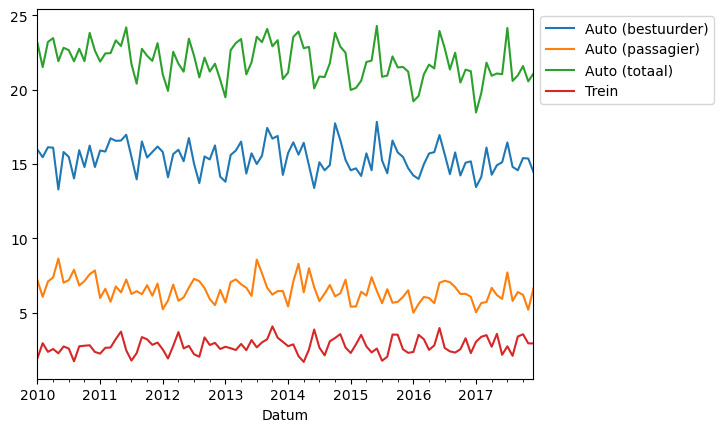

In [58]:
car_and_train_nl = car_and_train_per_month[car_and_train_per_month['RegioS'] == 'Nederland']

car_bestuurder = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Auto (bestuurder)']
car_passagier = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Auto (passagier)']
trein = car_and_train_nl[car_and_train_nl['Vervoerwijzen'] == 'Trein']

car_bestuurder.sort_index(inplace=True)
car_passagier.sort_index(inplace=True)
trein.sort_index(inplace=True)

data_Nederland = car_bestuurder[['Afstand_2']].copy()
data_Nederland.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
data_Nederland['Auto (passagier)'] = car_passagier[['Afstand_2']]
data_Nederland['Auto (totaal)'] = data_Nederland['Auto (bestuurder)'] + data_Nederland['Auto (passagier)']
data_Nederland['Trein'] = trein[['Afstand_2']]
display(data_Nederland)

data_Nederland.plot()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Total Kilometer per year per Province

In [59]:
total_province = car_and_train_total[car_and_train_total['RegioS'].isin(['Groningen (PV)', 
                                                                         'Friesland (PV)', 
                                                                         'Drenthe (PV)', 
                                                                         'Overijssel (PV)',
                                                                         'Flevoland (PV)',
                                                                         'Gelderland (PV)',
                                                                         'Utrecht (PV)',
                                                                         'Noord-Holland (PV)',
                                                                         'Zuid-Holland (PV)',
                                                                         'Zeeland (PV)',
                                                                         'Noord-Brabant (PV)',
                                                                         'Limburg (PV)'])]
display(total_province)

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2
ID,,,,,,
7080,10000,Auto (bestuurder),Totaal,Groningen (PV),2010,16.91
7081,10000,Auto (bestuurder),Totaal,Groningen (PV),2011,18.29
7082,10000,Auto (bestuurder),Totaal,Groningen (PV),2012,16.78
7083,10000,Auto (bestuurder),Totaal,Groningen (PV),2013,14.42
7084,10000,Auto (bestuurder),Totaal,Groningen (PV),2014,15.45
...,...,...,...,...,...,...
21251,10000,Trein,Totaal,Limburg (PV),2013,1.97
21252,10000,Trein,Totaal,Limburg (PV),2014,2.52
21253,10000,Trein,Totaal,Limburg (PV),2015,2.76


In [60]:
total_province.loc[:, 'Dag'] = 1
total_province.loc[:, 'Maand'] = 1

total_province['Datum'] = (
    total_province['Perioden'].astype(str) + '-' +
    total_province['Maand'].astype(str).str.zfill(2) + '-' +
    total_province['Dag'].astype(str).str.zfill(2)
)
total_province['Datum'] = pd.to_datetime(total_province['Datum'])
total_province.set_index('Datum', inplace=True)
display(total_province)

C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\621756361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Dag'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\621756361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_province.loc[:, 'Maand'] = 1
C:\Users\brigi\AppData\Local\Temp\ipykernel_21292\621756361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Populatie,Vervoerwijzen,KenmerkenVerplaatsing,RegioS,Perioden,Afstand_2,Dag,Maand
Datum,,,,,,,,
2010-01-01,10000,Auto (bestuurder),Totaal,Groningen (PV),2010,16.91,1,1
2011-01-01,10000,Auto (bestuurder),Totaal,Groningen (PV),2011,18.29,1,1
2012-01-01,10000,Auto (bestuurder),Totaal,Groningen (PV),2012,16.78,1,1
2013-01-01,10000,Auto (bestuurder),Totaal,Groningen (PV),2013,14.42,1,1
2014-01-01,10000,Auto (bestuurder),Totaal,Groningen (PV),2014,15.45,1,1
...,...,...,...,...,...,...,...,...
2013-01-01,10000,Trein,Totaal,Limburg (PV),2013,1.97,1,1
2014-01-01,10000,Trein,Totaal,Limburg (PV),2014,2.52,1,1
2015-01-01,10000,Trein,Totaal,Limburg (PV),2015,2.76,1,1


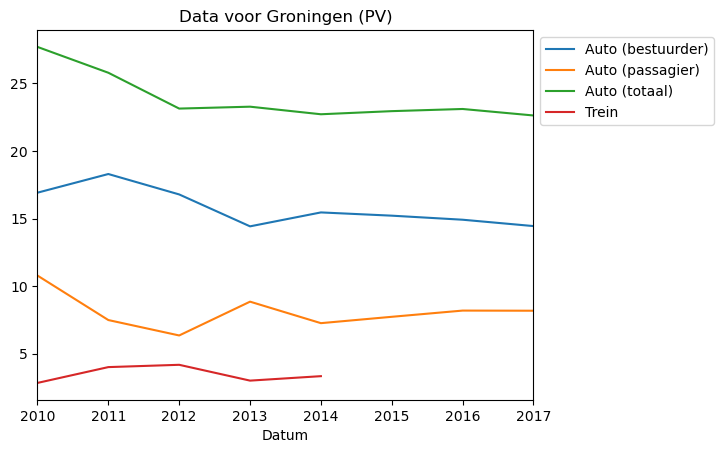

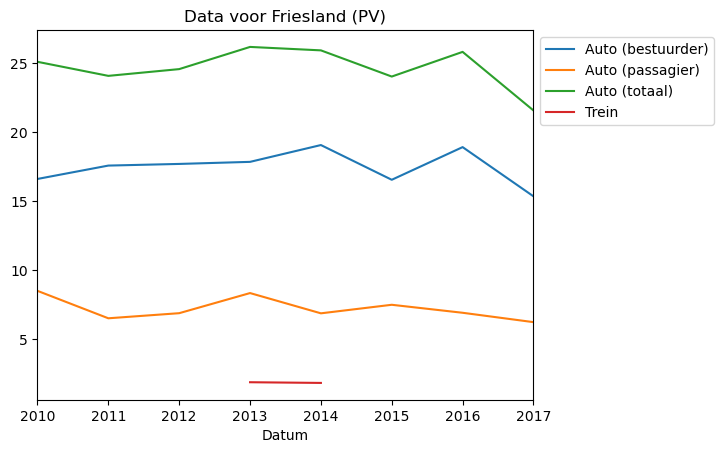

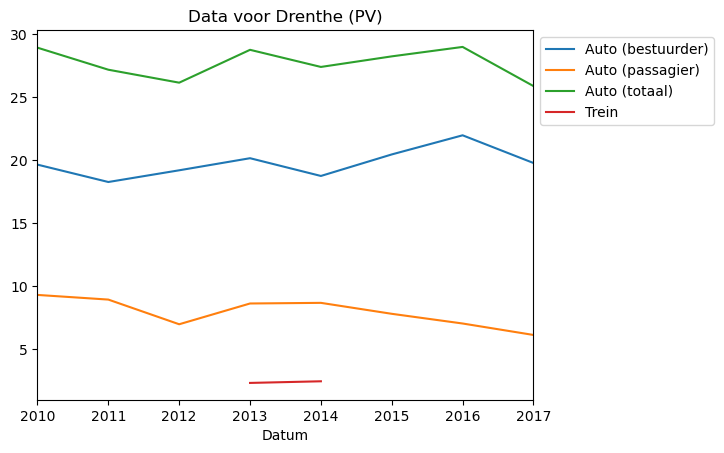

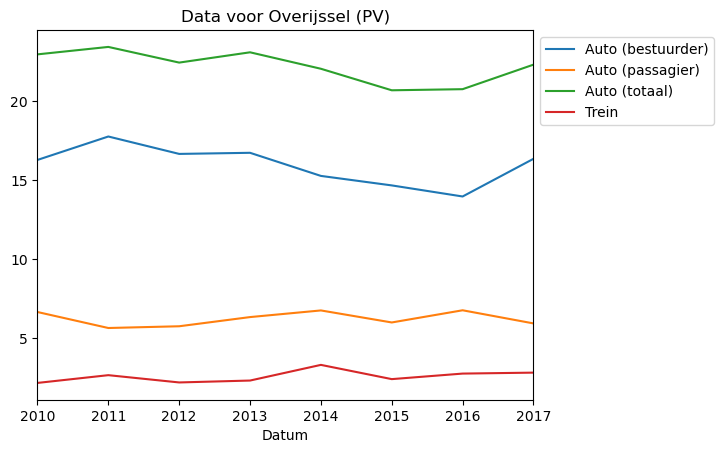

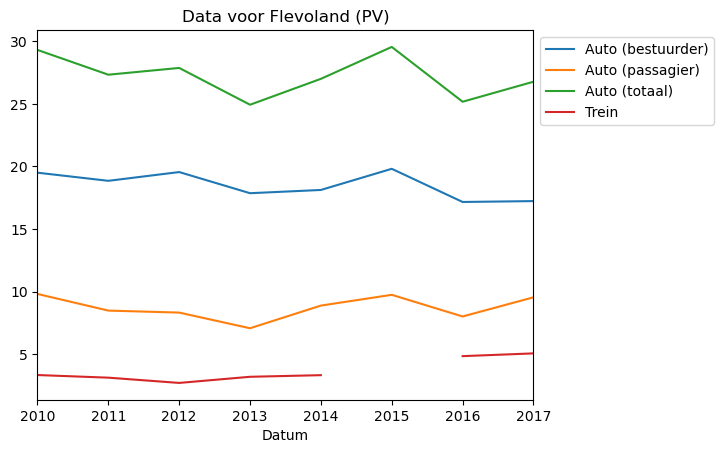

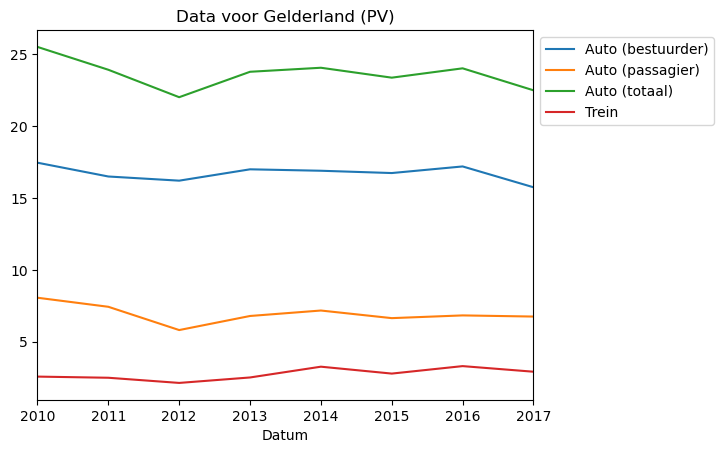

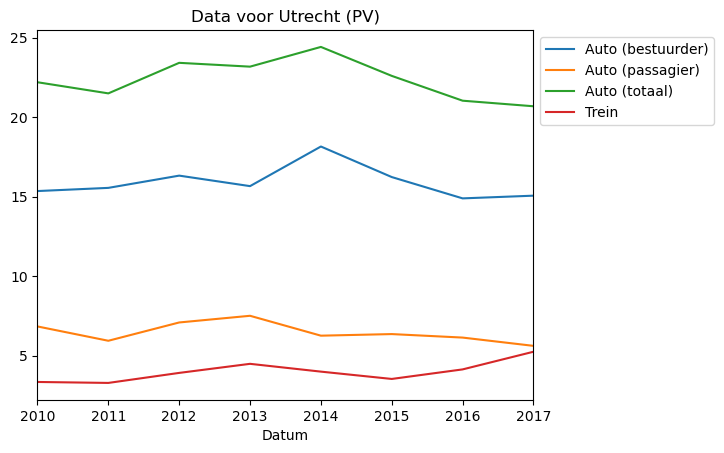

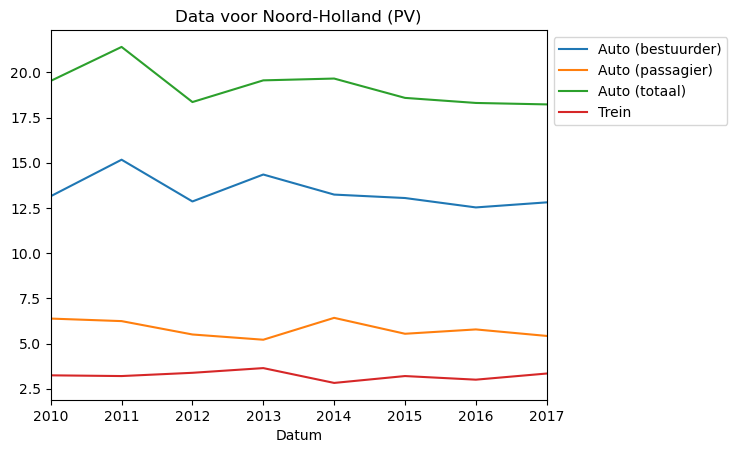

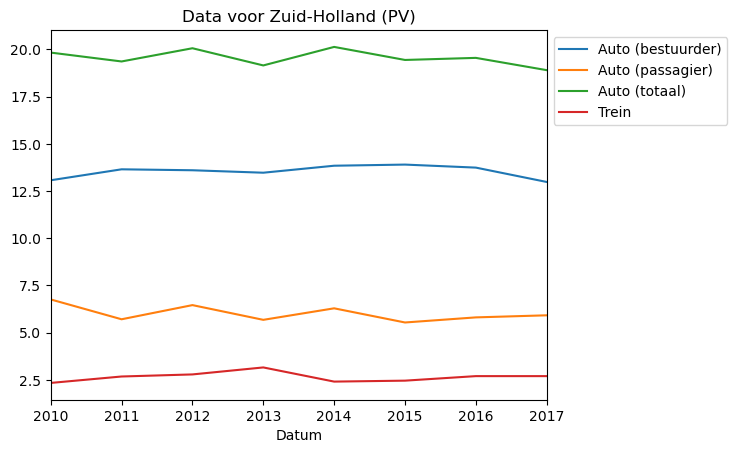

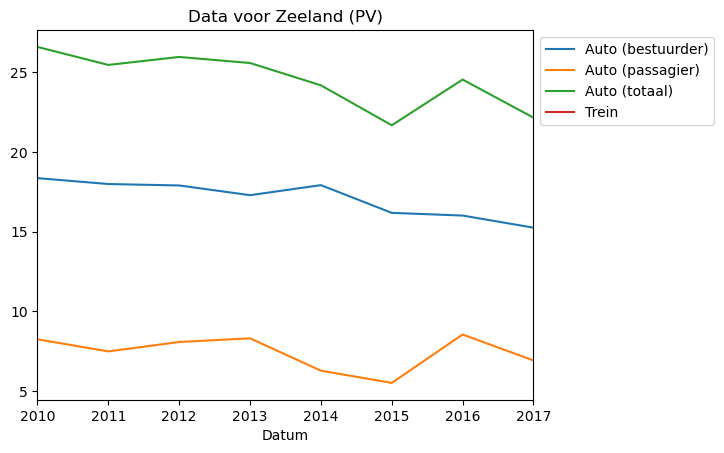

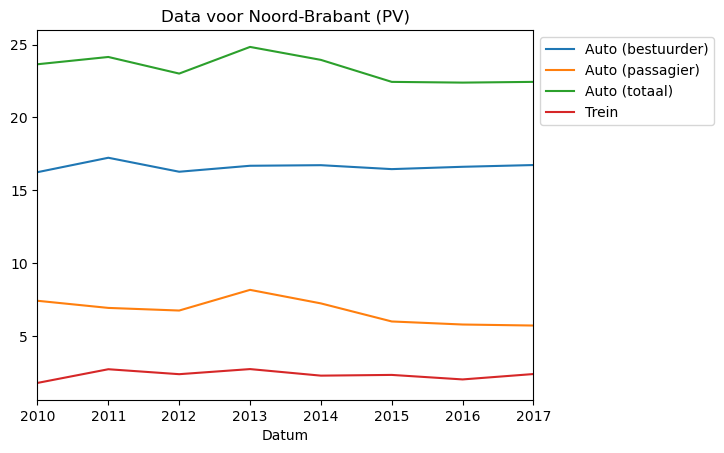

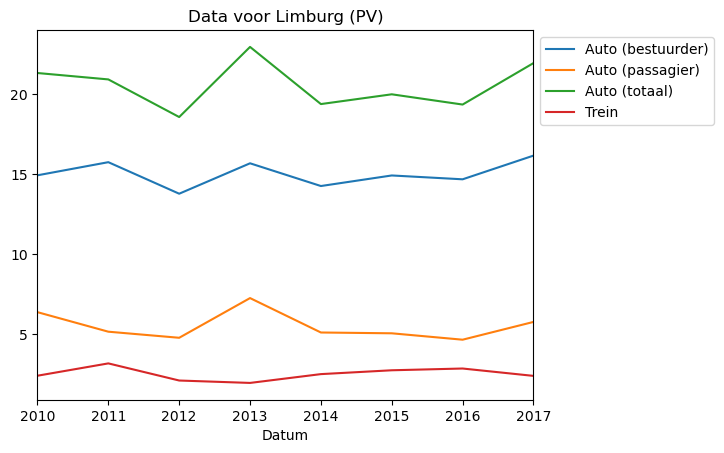

In [61]:
provinces = total_province['RegioS'].unique()

data_per_province = {}

for province in provinces:
    car_and_train_province = total_province[total_province['RegioS'] == province]
    
    car_bestuurder = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (bestuurder)']
    car_passagier = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Auto (passagier)']
    trein = car_and_train_province[car_and_train_province['Vervoerwijzen'] == 'Trein']
    
    car_bestuurder.sort_index(inplace=True)
    car_passagier.sort_index(inplace=True)
    trein.sort_index(inplace=True)
    
    data_province = car_bestuurder[['Afstand_2']].copy()
    data_province.rename(columns={'Afstand_2': 'Auto (bestuurder)'}, inplace=True)
    data_province['Auto (passagier)'] = car_passagier[['Afstand_2']]
    data_province['Auto (totaal)'] = data_province['Auto (bestuurder)'] + data_province['Auto (passagier)']
    data_province['Trein'] = trein[['Afstand_2']]
    
    data_per_province[province] = data_province
    
    data_province.plot(title=f'Data voor {province}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# display(data_per_province['Groningen (PV)'])
